In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [2]:
DATASET_URL = "./parkinsons.data"
FEATURES = [
	"subject",
	"age",
	"sex",
	"test_time",
	"motor_updrs",
	"total_updrs",
	"jitter(%)",
	"jitter(abs)",
	"jitter:rap",
	"jitter:ppq5",
	"jitter:ddp",
	"shimmer",
	"shimmer(db)",
	"shimmer:apq3",
	"shimmer:apq5",
	"shimmer:apq11",
	"shimmer:dda",
	"nhr",
	"hnr",
	"rpde",
	"dfa"
]
LABEL = "ppe"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"subject": "int64",
	"age": "float32",
	"sex": "category",
	"test_time": "float32",
	"motor_updrs": "float32",
	"total_updrs": "float32",
	"jitter(%)": "float32",
	"jitter(abs)": "float32",
	"jitter:rap": "float32",
	"jitter:ppq5": "float32",
	"jitter:ddp": "float32",
	"shimmer": "float32",
	"shimmer(db)": "float32",
	"shimmer:apq3": "float32",
	"shimmer:apq5": "float32",
	"shimmer:apq11": "float32",
	"shimmer:dda": "float32",
	"nhr": "float32",
	"hnr": "float32",
	"rpde": "float32",
	"dfa": "float32",
	"ppe": "float32"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=1024
BATCH_SIZE=50
SEED=1
COLUMNS

['subject',
 'age',
 'sex',
 'test_time',
 'motor_updrs',
 'total_updrs',
 'jitter(%)',
 'jitter(abs)',
 'jitter:rap',
 'jitter:ppq5',
 'jitter:ddp',
 'shimmer',
 'shimmer(db)',
 'shimmer:apq3',
 'shimmer:apq5',
 'shimmer:apq11',
 'shimmer:dda',
 'nhr',
 'hnr',
 'rpde',
 'dfa',
 'ppe']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [4]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True, skiprows=1)
data.head()

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter:rap,jitter:ppq5,...,shimmer(db),shimmer:apq3,shimmer:apq5,shimmer:apq11,shimmer:dda,nhr,hnr,rpde,dfa,ppe
0,1,72.0,0,5.643100,28.198999,34.397999,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006
1,1,72.0,0,12.666000,28.447001,34.894001,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810
2,1,72.0,0,19.681000,28.695000,35.389000,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014
3,1,72.0,0,25.646999,28.905001,35.810001,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277
4,1,72.0,0,33.641998,29.187000,36.375000,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361


In [5]:
# Drop columns
DROP_COLUMNS = ["subject"]

for column in DROP_COLUMNS:
	data = data.drop(column, axis=1)
	FEATURES.remove(column)
	COLUMNS.remove(column)
	DTYPE.pop(column)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            5875 non-null   float32 
 1   sex            5875 non-null   category
 2   test_time      5875 non-null   float32 
 3   motor_updrs    5875 non-null   float32 
 4   total_updrs    5875 non-null   float32 
 5   jitter(%)      5875 non-null   float32 
 6   jitter(abs)    5875 non-null   float32 
 7   jitter:rap     5875 non-null   float32 
 8   jitter:ppq5    5875 non-null   float32 
 9   jitter:ddp     5875 non-null   float32 
 10  shimmer        5875 non-null   float32 
 11  shimmer(db)    5875 non-null   float32 
 12  shimmer:apq3   5875 non-null   float32 
 13  shimmer:apq5   5875 non-null   float32 
 14  shimmer:apq11  5875 non-null   float32 
 15  shimmer:dda    5875 non-null   float32 
 16  nhr            5875 non-null   float32 
 17  hnr            5875 non-null   fl

In [7]:
# Missing values
data = data.dropna()
data.isna().sum()

age              0
sex              0
test_time        0
motor_updrs      0
total_updrs      0
jitter(%)        0
jitter(abs)      0
jitter:rap       0
jitter:ppq5      0
jitter:ddp       0
shimmer          0
shimmer(db)      0
shimmer:apq3     0
shimmer:apq5     0
shimmer:apq11    0
shimmer:dda      0
nhr              0
hnr              0
rpde             0
dfa              0
ppe              0
dtype: int64

In [8]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,age,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter:rap,jitter:ppq5,jitter:ddp,shimmer,shimmer(db),shimmer:apq3,shimmer:apq5,shimmer:apq11,shimmer:dda,nhr,hnr,rpde,dfa,ppe
count,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5875.000000
mean,9.628052e-09,-1.841894e-08,1.199176e-08,1.223369e-08,3.766209e-09,7.207560e-09,-1.014626e-09,3.288559e-09,-5.063472e-10,2.695981e-09,2.933674e-09,1.368717e-09,-2.934994e-09,-1.289421e-09,-5.613309e-09,4.181035e-09,-5.182426e-10,5.730041e-09,1.734983e-08,0.219589
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,0.091498
min,-3.265579e+00,-1.817446e+00,-2.000166e+00,-2.057966e+00,-9.466569e-01,-1.161111e+00,-8.506929e-01,-7.629815e-01,-8.517702e-01,-1.199058e+00,-1.237697e+00,-1.174502e+00,-1.092523e+00,-1.250516e+00,-1.174245e+00,-5.333439e-01,-4.665987e+00,-3.866744e+00,-1.963436e+00,0.021983
25%,-7.714671e-01,-8.610651e-01,-7.745782e-01,-7.148029e-01,-4.576594e-01,-6.001095e-01,-4.505077e-01,-3.904491e-01,-4.515863e-01,-5.773716e-01,-5.905294e-01,-5.950219e-01,-5.613909e-01,-5.912530e-01,-5.952688e-01,-3.545954e-01,-5.298619e-01,-7.099418e-01,-8.048366e-01,0.156340
50%,2.211414e-02,-2.508782e-02,-5.231267e-02,-1.348623e-01,-2.229405e-01,-2.639533e-01,-2.360084e-01,-2.108831e-01,-2.360206e-01,-2.525927e-01,-2.517438e-01,-2.610839e-01,-2.523139e-01,-2.387288e-01,-2.608275e-01,-2.290577e-01,5.605220e-02,7.695249e-03,-1.359692e-01,0.205500
75%,8.156954e-01,8.529262e-01,7.750756e-01,6.897653e-01,1.149124e-01,2.586939e-01,9.694576e-02,4.908556e-02,9.693238e-02,2.212206e-01,2.347177e-01,2.583332e-01,2.167030e-01,2.619106e-01,2.585891e-01,-1.100431e-02,6.442970e-01,7.186975e-01,8.194451e-01,0.264490
max,2.289489e+00,2.294608e+00,2.240828e+00,2.427531e+00,1.668571e+01,1.116063e+01,1.746499e+01,1.776447e+01,1.746598e+01,9.081220e+00,7.800931e+00,1.099383e+01,8.814745e+00,1.240861e+01,1.099408e+01,1.199822e+01,3.774533e+00,4.204980e+00,2.995380e+00,0.731730


In [9]:
# Normalise Label
min_max_scaler = preprocessing.MinMaxScaler()
data[[LABEL]] = min_max_scaler.fit_transform(data[[LABEL]])
# standard_scaler = preprocessing.StandardScaler()
# data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,age,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter:rap,jitter:ppq5,jitter:ddp,shimmer,shimmer(db),shimmer:apq3,shimmer:apq5,shimmer:apq11,shimmer:dda,nhr,hnr,rpde,dfa,ppe
count,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5.875000e+03,5875.000000
mean,9.628052e-09,-1.841894e-08,1.199176e-08,1.223369e-08,3.766209e-09,7.207560e-09,-1.014626e-09,3.288559e-09,-5.063472e-10,2.695981e-09,2.933674e-09,1.368717e-09,-2.934994e-09,-1.289421e-09,-5.613309e-09,4.181035e-09,-5.182426e-10,5.730041e-09,1.734983e-08,0.278418
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,0.128917
min,-3.265579e+00,-1.817446e+00,-2.000166e+00,-2.057966e+00,-9.466569e-01,-1.161111e+00,-8.506929e-01,-7.629815e-01,-8.517702e-01,-1.199058e+00,-1.237697e+00,-1.174502e+00,-1.092523e+00,-1.250516e+00,-1.174245e+00,-5.333439e-01,-4.665987e+00,-3.866744e+00,-1.963436e+00,0.000000
25%,-7.714671e-01,-8.610651e-01,-7.745782e-01,-7.148029e-01,-4.576594e-01,-6.001095e-01,-4.505077e-01,-3.904491e-01,-4.515863e-01,-5.773716e-01,-5.905294e-01,-5.950219e-01,-5.613909e-01,-5.912530e-01,-5.952688e-01,-3.545954e-01,-5.298619e-01,-7.099418e-01,-8.048366e-01,0.189303
50%,2.211414e-02,-2.508782e-02,-5.231267e-02,-1.348623e-01,-2.229405e-01,-2.639533e-01,-2.360084e-01,-2.108831e-01,-2.360206e-01,-2.525927e-01,-2.517438e-01,-2.610839e-01,-2.523139e-01,-2.387288e-01,-2.608275e-01,-2.290577e-01,5.605220e-02,7.695249e-03,-1.359692e-01,0.258567
75%,8.156954e-01,8.529262e-01,7.750756e-01,6.897653e-01,1.149124e-01,2.586939e-01,9.694576e-02,4.908556e-02,9.693238e-02,2.212206e-01,2.347177e-01,2.583332e-01,2.167030e-01,2.619106e-01,2.585891e-01,-1.100431e-02,6.442970e-01,7.186975e-01,8.194451e-01,0.341681
max,2.289489e+00,2.294608e+00,2.240828e+00,2.427531e+00,1.668571e+01,1.116063e+01,1.746499e+01,1.776447e+01,1.746598e+01,9.081220e+00,7.800931e+00,1.099383e+01,8.814745e+00,1.240861e+01,1.099408e+01,1.199822e+01,3.774533e+00,4.204980e+00,2.995380e+00,1.000000


In [10]:
# Set categories
for column in COLUMNS:
	if data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		data[column] = labelencoder.fit_transform(data[column])
		categories=data[column].unique()
		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
		print(data[column].cat.categories.tolist())

[0, 1]


In [11]:
data = data.astype(dtype=DTYPE)
data.dtypes

age               float32
sex              category
test_time         float32
motor_updrs       float32
total_updrs       float32
jitter(%)         float32
jitter(abs)       float32
jitter:rap        float32
jitter:ppq5       float32
jitter:ddp        float32
shimmer           float32
shimmer(db)       float32
shimmer:apq3      float32
shimmer:apq5      float32
shimmer:apq11     float32
shimmer:dda       float32
nhr               float32
hnr               float32
rpde              float32
dfa               float32
ppe               float32
dtype: object

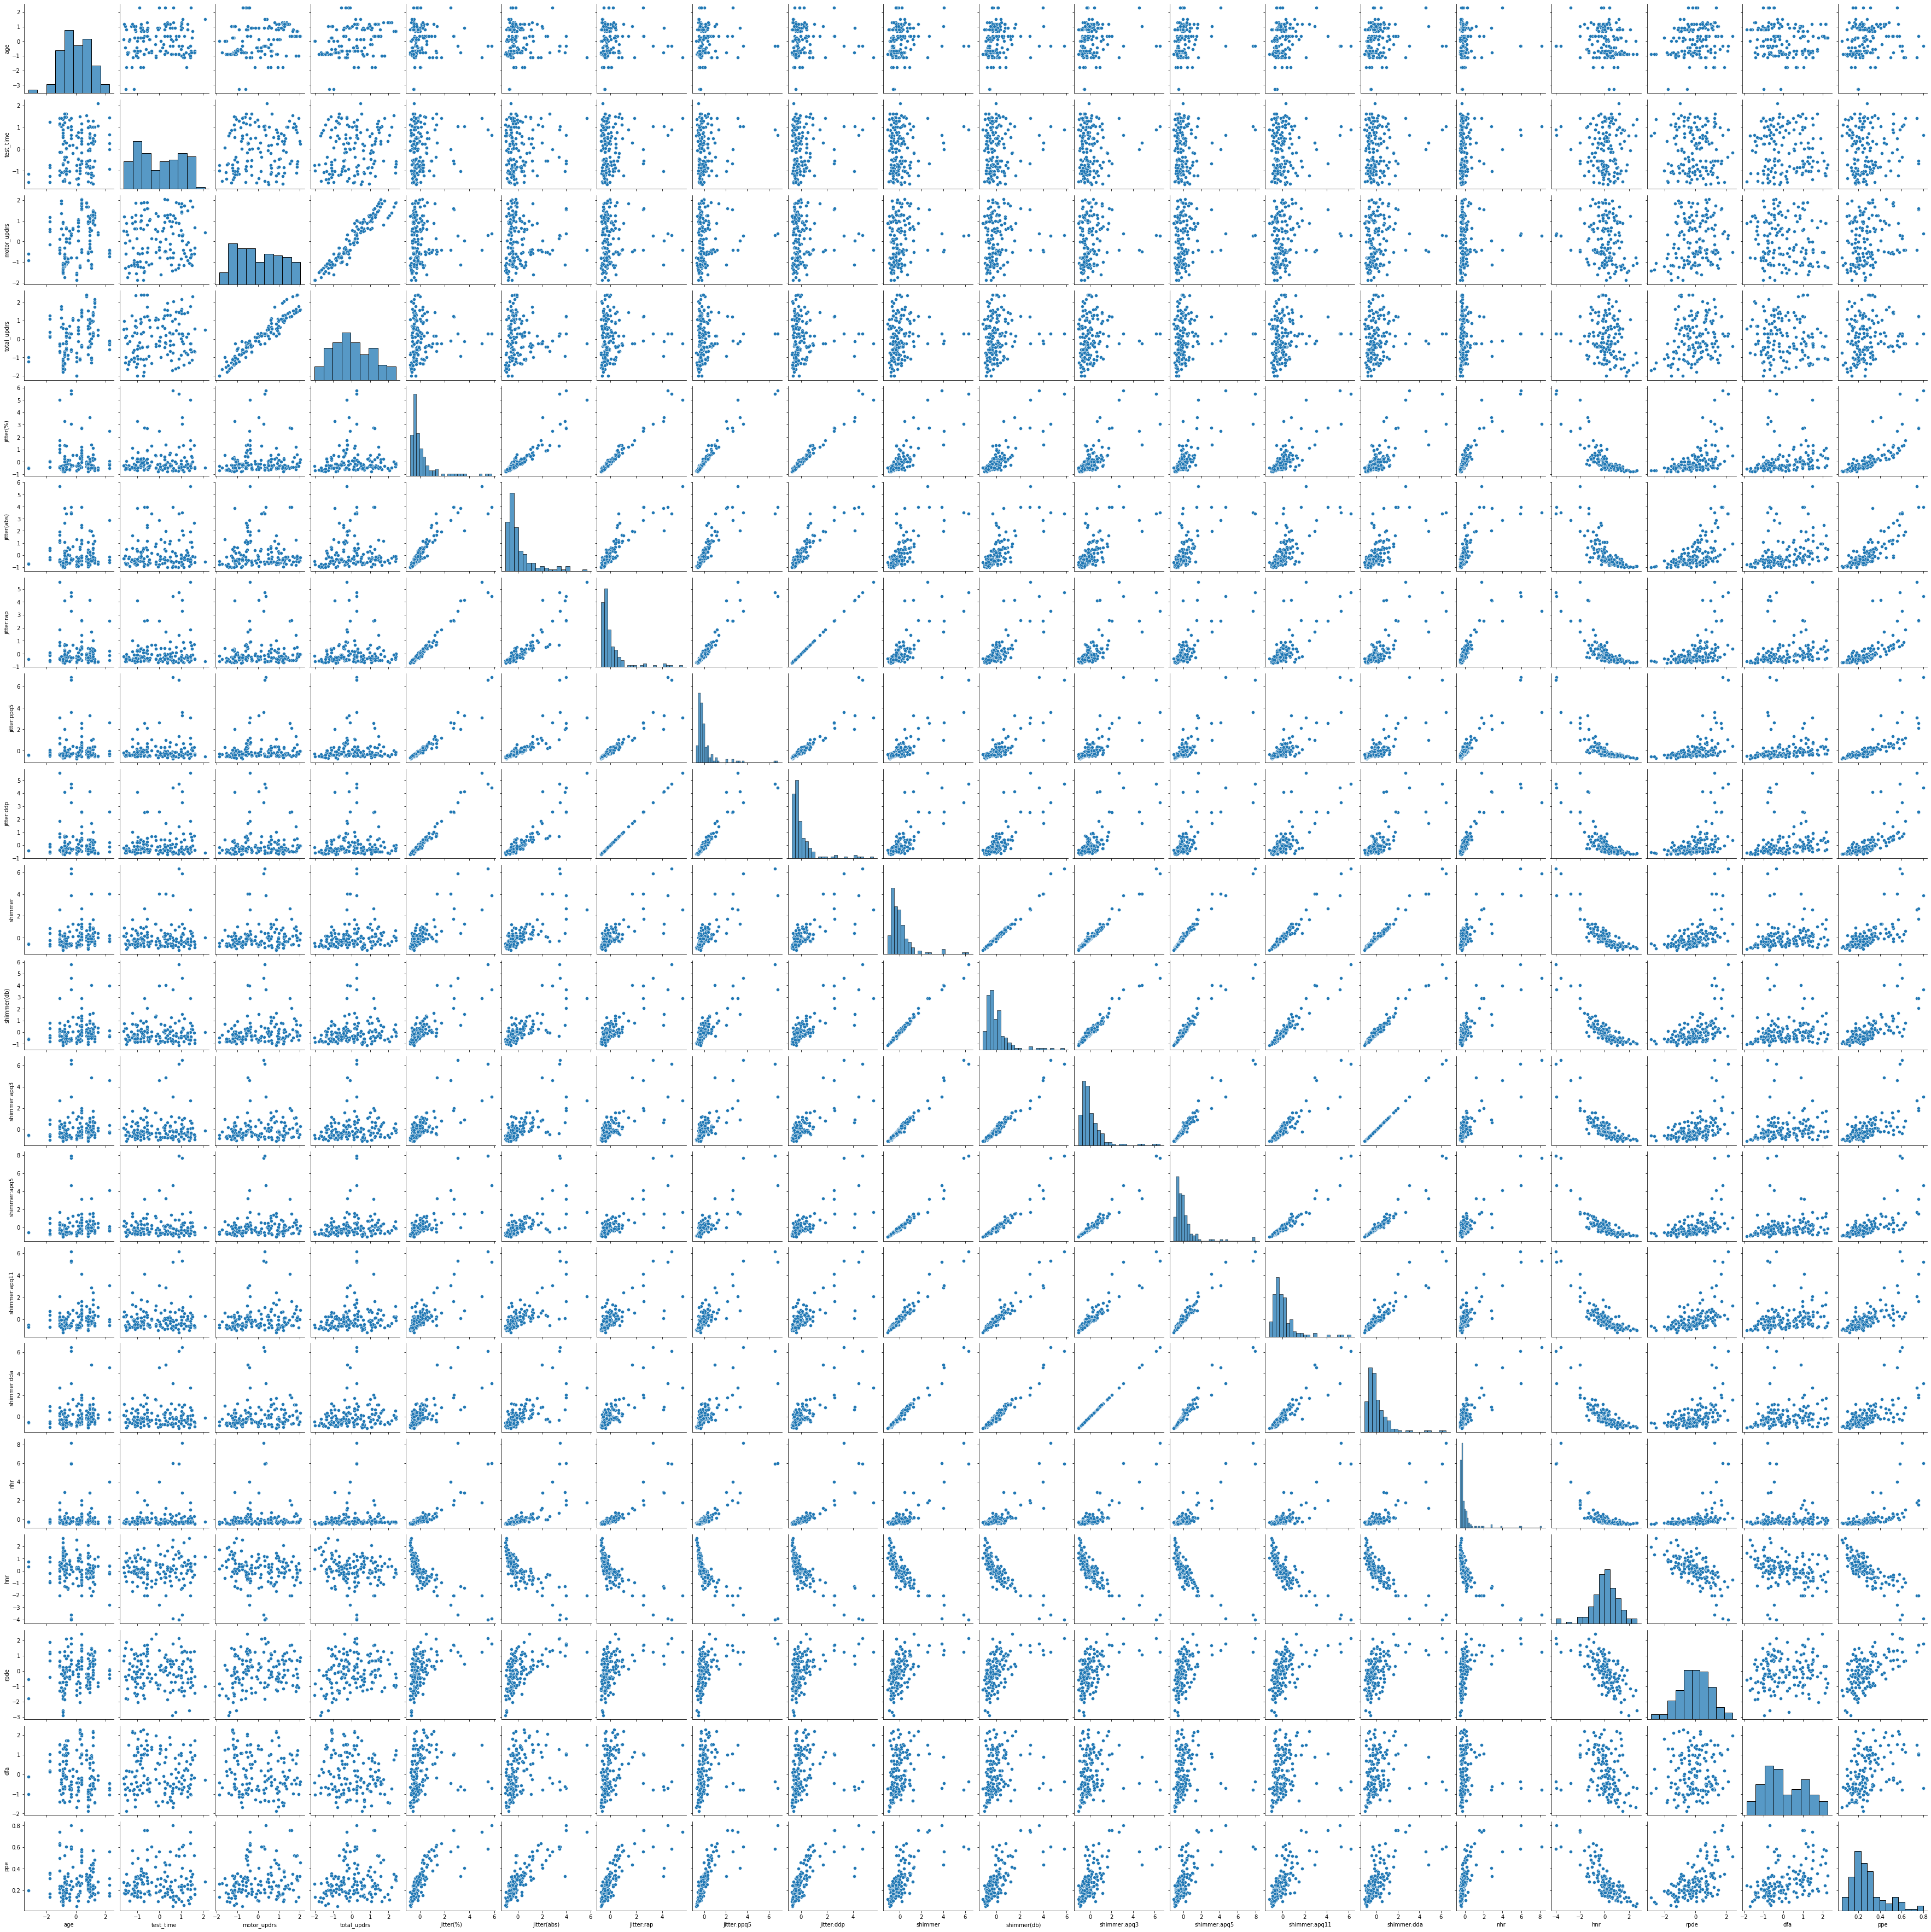

In [12]:
sns.pairplot(data.sample(n=150, random_state=1))

In [13]:
target = data.pop(LABEL)
target

0       0.194544
1       0.121335
2       0.265104
3       0.437884
4       0.241814
          ...   
5870    0.270078
5871    0.146851
5872    0.168492
5873    0.169155
5874    0.185104
Name: ppe, Length: 5875, dtype: float32

In [14]:
data = pd.get_dummies(data, dtype="float32")
data

,age,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter:rap,jitter:ppq5,jitter:ddp,shimmer,...,shimmer:apq3,shimmer:apq5,shimmer:apq11,shimmer:dda,nhr,hnr,rpde,dfa,sex_0,sex_1
0,0.815695,-1.632090,0.849197,0.502745,0.082905,-0.284242,0.327452,-0.028637,0.328505,-0.324594,...,-0.209709,-0.423357,-0.543466,-0.209704,-0.298721,-0.009205,-1.214066,-1.478499,1.0,0.0
1,0.815695,-1.500676,0.879706,0.549103,-0.560793,-0.756723,-0.533746,-0.476212,-0.534825,-0.534016,...,-0.545158,-0.565592,-0.529955,-0.545153,-0.351965,1.282650,-1.055119,-1.247880,1.0,0.0
2,0.815695,-1.369410,0.910216,0.595367,-0.238944,-0.539382,-0.300038,-0.320767,-0.298983,-0.669115,...,-0.741592,-0.702426,-0.645545,-0.741587,-0.199370,0.318712,-0.784860,-1.540140,1.0,0.0
3,0.815695,-1.257773,0.936051,0.634716,-0.155370,-0.485186,-0.344859,-0.170682,-0.344871,-0.423692,...,-0.460540,-0.449763,-0.392849,-0.460787,-0.071754,0.644530,-0.536487,-1.062115,1.0,0.0
4,0.815695,-1.108169,0.970743,0.687522,-0.498557,-0.663894,-0.658604,-0.529814,-0.659682,-0.658276,...,-0.783145,-0.651413,-0.464905,-0.783392,-0.343370,1.036305,-0.689195,-1.297953,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,-0.431361,0.934231,0.146246,0.417413,-0.372307,-0.358449,-0.421694,-0.427970,-0.422773,-0.583565,...,-0.561024,-0.528983,-0.600010,-0.560767,-0.116990,0.160696,0.997028,-1.411923,1.0,0.0
5871,-0.431361,1.066152,0.085104,0.370962,-0.566128,-0.537436,-0.575365,-0.484252,-0.574309,-0.421369,...,-0.501338,-0.442561,-0.422372,-0.501081,-0.338311,0.281189,-0.153430,-1.242097,1.0,0.0
5872,-0.431361,1.196763,0.024453,0.324884,-0.473663,-0.537158,-0.469717,-0.377049,-0.469728,-0.350143,...,-0.260328,-0.335135,-0.435882,-0.260576,-0.241573,0.789028,-0.629379,-1.048856,1.0,0.0
5873,-0.431361,1.326064,-0.035582,0.279274,-0.594579,-0.658336,-0.546552,-0.473532,-0.547630,-0.743051,...,-0.772568,-0.686822,-0.721104,-0.772815,-0.404372,0.639170,0.269141,-1.269038,1.0,0.0


In [15]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)